In [2]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [4]:
def get_stock_data(normalized=0):
    url = "AAPL.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [5]:
df = get_stock_data(0)
df.head()

C:\Users\NAVANEETH\AppData\Local\Temp\ipykernel_1996\900288237.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2022-04-21,168.910004,171.529999,165.910004,166.419998,0.016542,87227800,2022,04,21
1,2022-04-22,166.460007,167.869995,161.500000,161.789993,0.016082,84882400,2022,04,22
2,2022-04-25,161.119995,163.169998,158.460007,162.880005,0.016190,96046400,2022,04,25
3,2022-04-26,162.250000,162.339996,156.720001,156.800003,0.015586,95623200,2022,04,26
4,2022-04-27,155.910004,159.789993,155.380005,156.570007,0.015563,88063200,2022,04,27


In [6]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,168.910004,171.529999,166.419998,0.016542
1,166.460007,167.869995,161.789993,0.016082
2,161.119995,163.169998,162.880005,0.016190
3,162.250000,162.339996,156.800003,0.015586
4,155.910004,159.789993,156.570007,0.015563


In [7]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open    High   Close    Volume
0    1.6891  1.7153  1.6642  1.654180
1    1.6646  1.6787  1.6179  1.608158
2    1.6112  1.6317  1.6288  1.618993
3    1.6225  1.6234  1.5680  1.558559
4    1.5591  1.5979  1.5657  1.556273
..      ...     ...     ...       ...
246  1.6459  1.6632  1.6521  1.652100
247  1.6509  1.6539  1.6523  1.652300
248  1.6610  1.6741  1.6647  1.664700
249  1.6580  1.6816  1.6763  1.676300
250  1.6609  1.6787  1.6665  1.666500

[251 rows x 4 columns]


In [8]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [9]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [10]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 1s 216ms/step - loss: 2.1876 - val_loss: 2.1271
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 2.1763 - val_loss: 2.1156
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 2.1645 - val_loss: 2.1032
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 2.1517 - val_loss: 2.0899
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 2.1379 - val_loss: 2.0753
Epoch 6/10
2/2 [==============================] - 0s 16ms/step - loss: 2.1227 - val_loss: 2.0592
Epoch 7/10
2/2 [==============================] - 0s 34ms/step - loss: 2.1062 - val_loss: 2.0415
Epoch 8/10
2/2 [==============================] - 0s 33ms/step - loss: 2.0879 - val_loss: 2.0221
Epoch 9/10
2/2 [==============================] - 0s 27ms/step - loss: 2.0678 - val_loss: 2.0007
Epoch 10/10
2/2 [==============================] - 0s 16ms/step - loss: 2.0456 - val_loss: 1.9771


In [11]:
predictions = classifier.predict(X_test)
print(predictions[:10])

2/2 [==============================] - 0s 0s/step
[[0.05993316]
 [0.05998151]
 [0.05989704]
 [0.05941204]
 [0.05986634]
 [0.05988856]
 [0.06019242]
 [0.060176  ]
 [0.05982232]
 [0.05931651]]


In [12]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2.02 MSE (1.42 RMSE)
Test Score: 2.26 MSE (1.50 RMSE)


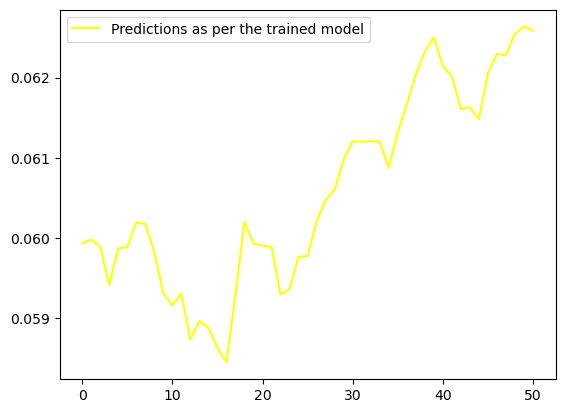

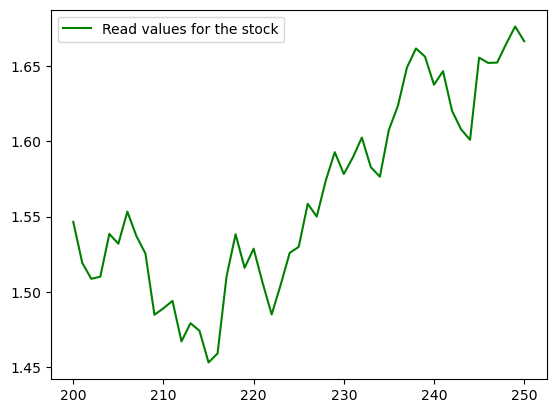

In [13]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='yellow', label='Predictions as per the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='green', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()